In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [19]:
train = pd.read_csv('./train.csv')

In [18]:
train['grapheme_root'].value_counts()

72     5736
64     5596
13     5420
107    5321
23     5149
       ... 
130     144
158     143
102     141
33      136
73      130
Name: grapheme_root, Length: 168, dtype: int64

In [23]:
images = pd.read_parquet('./train_image_data_1.parquet')
images = images.set_index('image_id')
# images = images.values.reshape(len(images), 137,236)

FileNotFoundError: [Errno 2] No such file or directory: './train_image_data_1.parquet'

In [24]:
images

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
image_id,,,,,,,,,,,,,,,,,,,,,
Train_0,254,253,252,253,251,252,253,251,251,253,...,253,253,253,253,253,253,253,253,253,251
Train_1,251,244,238,245,248,246,246,247,251,252,...,255,255,255,255,255,255,255,255,255,254
Train_2,251,250,249,250,249,245,247,252,252,252,...,254,253,252,252,253,253,253,253,251,249
Train_3,247,247,249,253,253,252,251,251,250,250,...,254,254,254,254,254,253,253,252,251,252
Train_4,249,248,246,246,248,244,242,242,229,225,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Train_50205,247,250,250,250,252,250,250,250,251,250,...,246,248,252,252,249,248,250,247,243,243
Train_50206,250,251,250,244,245,243,246,248,246,247,...,255,255,255,255,255,255,255,255,255,253
Train_50207,246,245,246,246,245,245,247,247,245,246,...,247,246,248,246,245,248,249,246,243,245


In [4]:
HEIGHT = 236
WIDTH = 236

In [45]:
class_map = pd.read_csv('./class_map.csv')
class_map[class_map['label'] == 0]

,component_type,label,component
0,grapheme_root,0,ং
168,vowel_diacritic,0,0
179,consonant_diacritic,0,0


ং


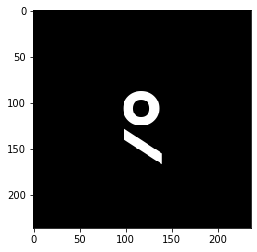

ঃ


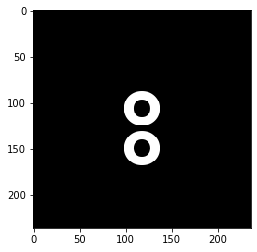

অ


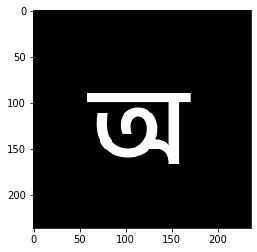

আ


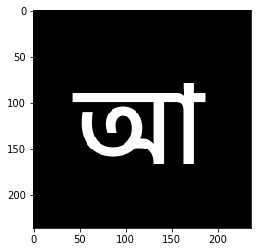

ই


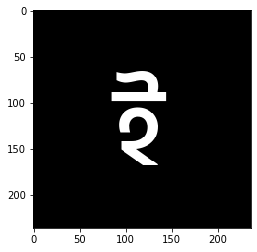

In [39]:


# data = pd.DataFrame({
#     'image': images
# }, index=images.index)
def char_to_image(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('./hind_siliguri_normal_500.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 3), char, font=myfont)
#     draw.text((0, 0), char, font=myfont)

    return image

for c in class_map['component'].iloc[:5]:
    print(c)
    plt.imshow(char_to_image(c))
    plt.show()
    # char_to_image('ই')

image_id               Train_0
grapheme_root               15
vowel_diacritic              9
consonant_diacritic          5
grapheme                ক্ট্রো
Name: 0, dtype: object


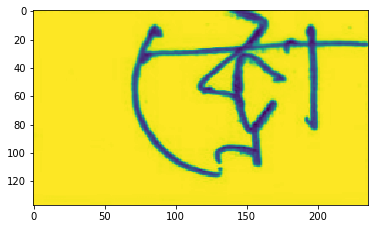

ক্ট
ো
্র


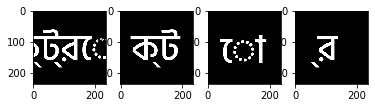

image_id               Train_1
grapheme_root              159
vowel_diacritic              0
consonant_diacritic          0
grapheme                     হ
Name: 1, dtype: object


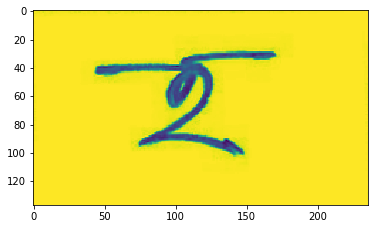

হ
0
0


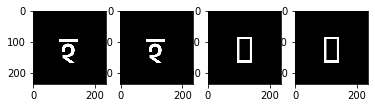

image_id               Train_2
grapheme_root               22
vowel_diacritic              3
consonant_diacritic          5
grapheme                  খ্রী
Name: 2, dtype: object


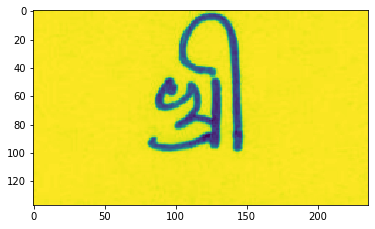

খ
ী
্র


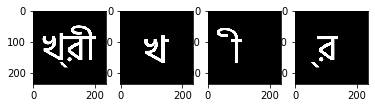

image_id               Train_3
grapheme_root               53
vowel_diacritic              2
consonant_diacritic          2
grapheme                  র্টি
Name: 3, dtype: object


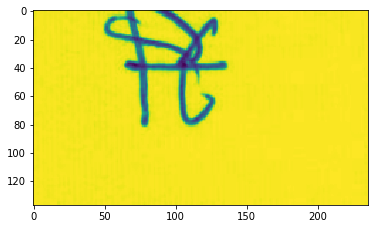

ট
ি
র্


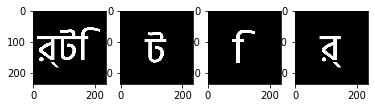

image_id               Train_4
grapheme_root               71
vowel_diacritic              9
consonant_diacritic          5
grapheme                  থ্রো
Name: 4, dtype: object


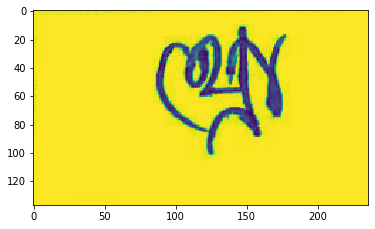

থ
ো
্র


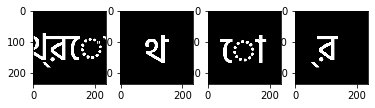

image_id               Train_5
grapheme_root              153
vowel_diacritic              9
consonant_diacritic          0
grapheme                  স্পো
Name: 5, dtype: object


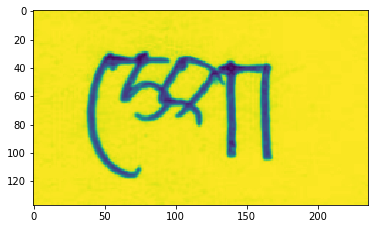

স্প
ো
0


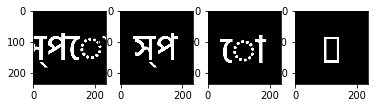

image_id               Train_6
grapheme_root               52
vowel_diacritic              2
consonant_diacritic          0
grapheme                  ঞ্জি
Name: 6, dtype: object


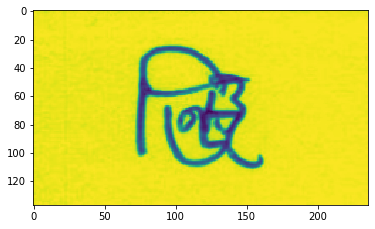

ঞ্জ
ি
0


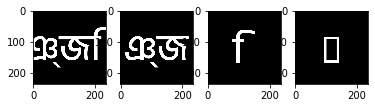

image_id               Train_7
grapheme_root              139
vowel_diacritic              3
consonant_diacritic          0
grapheme                    ষী
Name: 7, dtype: object


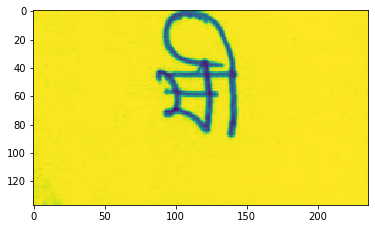

ষ
ী
0


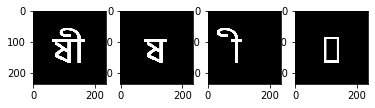

image_id               Train_8
grapheme_root               67
vowel_diacritic              0
consonant_diacritic          0
grapheme                   ত্থ
Name: 8, dtype: object


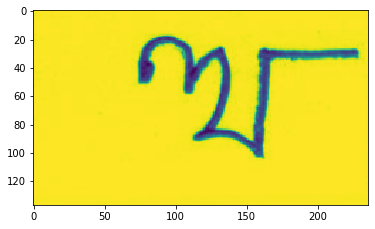

ত্থ
0
0


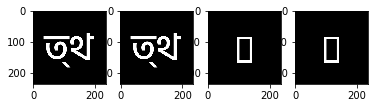

image_id               Train_9
grapheme_root               64
vowel_diacritic              7
consonant_diacritic          1
grapheme                   তেঁ
Name: 9, dtype: object


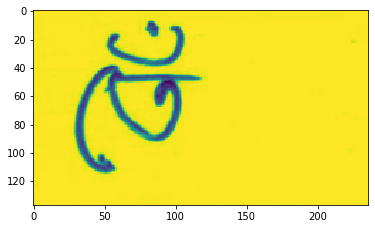

ত
ে
ঁ


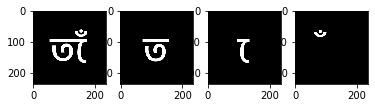

In [46]:
for i in range(10):
    image = images[i]
    row = train.iloc[i]
    print(row)
    
    plt.imshow(image)
    plt.show()
    
    plt.subplot(1, 4, 1)
    plt.imshow(char_to_image(row['grapheme']))
    for j, ct in enumerate(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'], 2):
        plt.subplot(1, 4, j)
        char = class_map[(class_map['component_type'] == ct) & (class_map['label'] == row[ct])].iloc[0]['component']
        print(char)
        plt.imshow(char_to_image(char))
    plt.show()